# Lab 4

In [3]:
!pip install pywaffle

     |████████████████████████████████| 532kB 11.9MB/s 


In [4]:
import numpy as np
import pandas as pd
from pywaffle import Waffle
import matplotlib.pyplot as plt

In [5]:
data_url = 'https://python-graph-gallery.com/wp-content/uploads/gapminderData.csv'
df = pd.read_csv(data_url)
df.head()

country  year         pop continent  lifeExp   gdpPercap
0  Afghanistan  1952   8425333.0      Asia   28.801  779.445314
1  Afghanistan  1957   9240934.0      Asia   30.332  820.853030
2  Afghanistan  1962  10267083.0      Asia   31.997  853.100710
3  Afghanistan  1967  11537966.0      Asia   34.020  836.197138
4  Afghanistan  1972  13079460.0      Asia   36.088  739.981106

# Waffle Chart

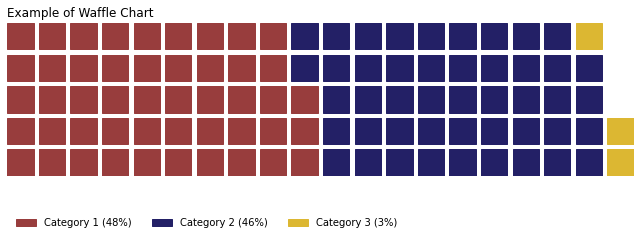

In [6]:
data = {'Category 1': 48, 'Category 2': 46, 'Category 3': 3}
fig = plt.figure(
    FigureClass=Waffle, 
    rows=5, 
    values=data, 
    colors=("#983D3D", "#232066", "#DCB732"),
    title={'label': 'Example of Waffle Chart', 'loc': 'left'},
    labels=["{0} ({1}%)".format(k, v) for k, v in data.items()],
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(data), 'framealpha': 0},
    figsize=(9, 6)
)
plt.show()

# Waffle Chart is a Custom Figure

In [7]:
from matplotlib.figure import Figure


class CustomFigure(Figure):
    def __init__(self, *args, figtitle='custom title', **kwargs):
        super().__init__(*args, **kwargs)
        self.text(0.5, 0.95, figtitle, ha='center')

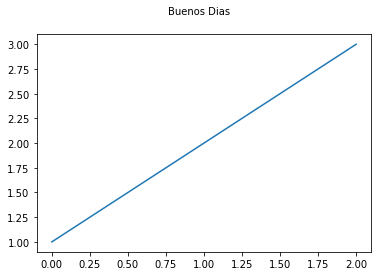

In [9]:
fig = plt.figure(FigureClass=CustomFigure, figtitle='Buenos Dias')
ax = fig.subplots()
ax.plot([1, 2, 3])
plt.show()

# Exercise 1

Create a waffle chart with population for each continent in year 2007

# Word Cloud

In [10]:
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

In [16]:
from wordcloud import WordCloud, STOPWORDS

In [12]:
!wget --quiet https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/alice_novel.txt

In [13]:
text = open('./alice_novel.txt', encoding="utf-8").read()

In [14]:
text

'\ufeffProject Gutenberg\'s Alice\'s Adventures in Wonderland, by Lewis Carroll\n\nThis eBook is for the use of anyone anywhere at no cost and with\nalmost no restrictions whatsoever.  You may copy it, give it away or\nre-use it under the terms of the Project Gutenberg License included\nwith this eBook or online at www.gutenberg.org\n\n\nTitle: Alice\'s Adventures in Wonderland\n\nAuthor: Lewis Carroll\n\nPosting Date: June 25, 2008 [EBook #11]\nRelease Date: March, 1994\n[Last updated: December 20, 2011]\n\nLanguage: English\n\n\n*** START OF THIS PROJECT GUTENBERG EBOOK ALICE\'S ADVENTURES IN WONDERLAND ***\n\n\n\n\n\n\n\n\n\n\nALICE\'S ADVENTURES IN WONDERLAND\n\nLewis Carroll\n\nTHE MILLENNIUM FULCRUM EDITION 3.0\n\n\n\n\nCHAPTER I. Down the Rabbit-Hole\n\nAlice was beginning to get very tired of sitting by her sister on the\nbank, and of having nothing to do: once or twice she had peeped into the\nbook her sister was reading, but it had no pictures or conversations in\nit, \'and w

In [ ]:
stopwords = set(STOPWORDS)
stopwords

In [39]:
wc = WordCloud(background_color="white", max_words=2000,
               stopwords=stopwords, contour_width=3, contour_color='steelblue')
wc.generate(text)

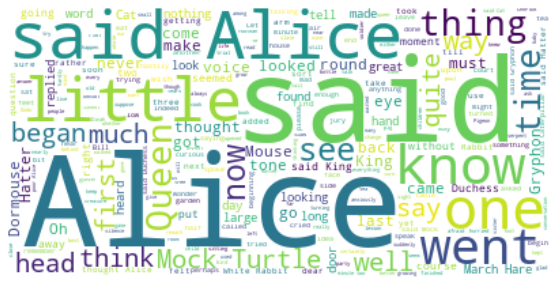

In [40]:
plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [41]:
import re
def getFrequencyDictForText(sentence):
    fullTermsDict = {}
    tmpDict = {}

    # making dict for counting frequencies
    for text in sentence.split(" "):
        if re.match("a|the|an|the|to|in|for|of|or|by|with|is|on|that|be", text):
            continue
        val = tmpDict.get(text, 0)
        tmpDict[text.lower()] = val + 1
    for key in tmpDict:
        fullTermsDict[key] = tmpDict[key]
    return fullTermsDict

In [42]:
text_dict = getFrequencyDictForText(text)
wc.generate_from_frequencies(text_dict)

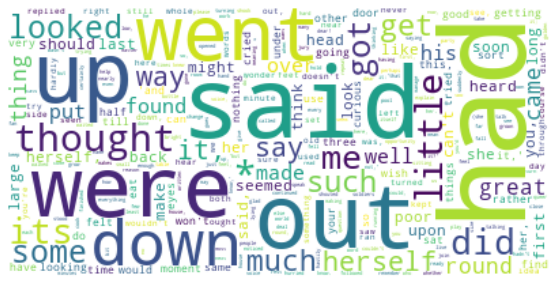

In [43]:
plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [44]:
!wget --quiet https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Images/alice_mask.png

In [45]:
alice_mask = np.array(Image.open('alice_mask.png'))
alice_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

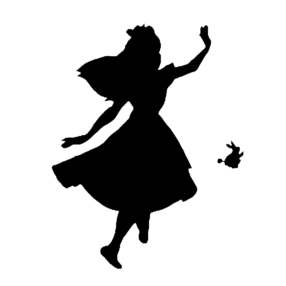

In [46]:
fig = plt.figure(figsize=(10,5))
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

In [49]:
wc = WordCloud(background_color="white", max_words=2000, mask=alice_mask,
               stopwords=stopwords, contour_width=1, contour_color='steelblue')
wc.generate_from_frequencies(text_dict)

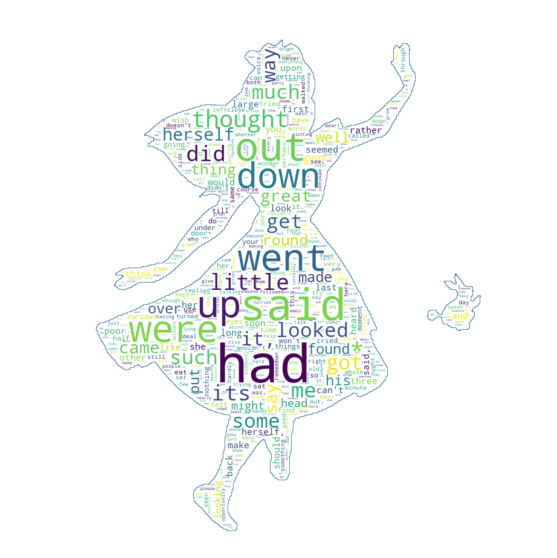

In [50]:
plt.figure(figsize=(20,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

# Exercise 2

Create a word cloud showing the most populated countries

In [ ]:
df2 = df[df["year"] == 2007]
poblacion_total = df2["pop"].sum()
poblacion_total

6251013179.0

In [ ]:
df2.set_index("country", inplace=True)
df2.head()

year         pop continent  lifeExp     gdpPercap
country                                                       
Afghanistan  2007  31889923.0      Asia   43.828    974.580338
Albania      2007   3600523.0    Europe   76.423   5937.029526
Algeria      2007  33333216.0    Africa   72.301   6223.367465
Angola       2007  12420476.0    Africa   42.731   4797.231267
Argentina    2007  40301927.0  Americas   75.320  12779.379640

In [ ]:
text = ""
max_palabras = 1000
for country in df2.index.values:
    if len(country.split(' ')) > 1:
        country_name = "".join(country.split(' '))
    else:
        country_name = country
    x = int(max_palabras * df2.loc[country, "pop"] / poblacion_total)
    text += x * (country_name + " ")

In [ ]:
wc = WordCloud(background_color="white", max_words=2000, stopwords=stopwords, 
               contour_width=1, contour_color='steelblue', collocations=False)
wc.generate(text)

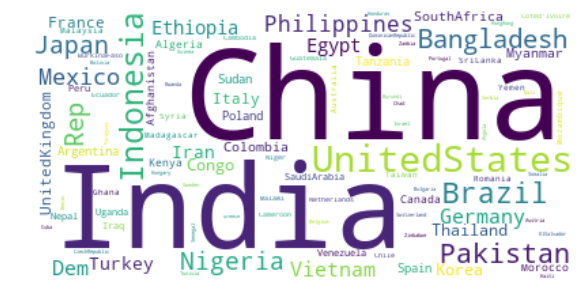

In [ ]:
plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

# Heatmap

In [ ]:
import plotly.graph_objects as go

In [ ]:
fig = go.Figure(data=go.Heatmap(
                   z=[[1, 20, 30, 50, 1], [20, 1, 60, 80, 30], [30, 60, 1, -10, 20]],
                   x=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'],
                   y=['Morning', 'Afternoon', 'Evening']))
fig.show()

# Exercise 3 

Create a heatmap with life expectancy by year for each country in América

In [ ]:
df2 = df[df.continent == "Americas"]

In [ ]:
fig = go.Figure(data=go.Heatmap(
                   z=df2.lifeExp,
                   x=df2.year,
                   y=df2.country))
fig.show()